# Optical Flow Estimation Demo

Reimplementation of `estimate_flow_demo.m` from Sun, Roth & Black,
"Secrets of Optical Flow Estimation and Their Principles" (CVPR 2010).

This demo runs the **Classic+NL-Fast** method on the Middlebury RubberWhale
sequence and evaluates against ground truth.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import time

from optical_flow import estimate_flow, flow_to_color, plot_flow, flow_angular_error
from optical_flow.io.flo_io import read_flo

%matplotlib inline

## Load RubberWhale Sequence

Image size: 584 x 388 x 3


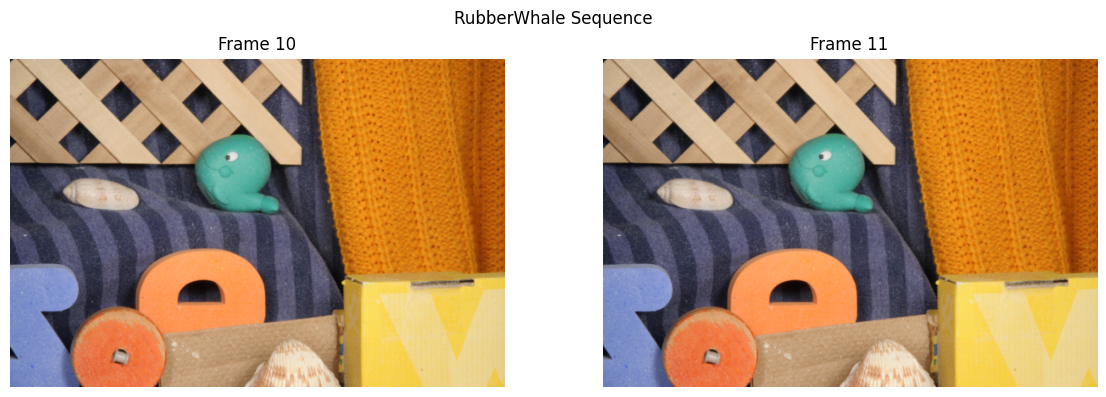

In [2]:
# Load the RubberWhale sequence (sequence 4 in middle-other)
data_dir = os.path.join('..', 'data')
im1 = np.array(Image.open(os.path.join(data_dir, 'other-data', 'RubberWhale', 'frame10.png'))).astype(float)
im2 = np.array(Image.open(os.path.join(data_dir, 'other-data', 'RubberWhale', 'frame11.png'))).astype(float)
gt = read_flo(os.path.join(data_dir, 'other-gt-flow', 'RubberWhale', 'flow10.flo'))
tu, tv = gt[:, :, 0], gt[:, :, 1]

print(f'Image size: {im1.shape[1]} x {im1.shape[0]} x {im1.shape[2]}')

# Display input images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(im1.astype(np.uint8))
axes[0].set_title('Frame 10')
axes[0].axis('off')
axes[1].imshow(im2.astype(np.uint8))
axes[1].set_title('Frame 11')
axes[1].axis('off')
plt.suptitle('RubberWhale Sequence')
plt.tight_layout()
plt.show()

## Run Classic+NL-Fast

This is the default method from `estimate_flow_demo.m`.
Uses generalized Charbonnier penalties, texture decomposition,
weighted median filtering, and GNC optimization with 2 stages.

In [3]:
# Run optical flow estimation (matches: uv = estimate_flow_interface(im1, im2, 'classic+nl-fast'))
uv = estimate_flow(im1, im2, method='classic+nl-fast')

GNC stage: 1
  Pyramid level: 5
    Iter: 1 1 (delta: 2.591279)
    Iter: 2 1 (delta: 1.247181)
    Iter: 3 1 (delta: 1.230134)
  Pyramid level: 4
    Iter: 1 1 (delta: 6.707288)
    Iter: 2 1 (delta: 4.294094)
    Iter: 3 1 (delta: 4.322884)
  Pyramid level: 3
    Iter: 1 1 (delta: 22.984370)
    Iter: 2 1 (delta: 16.176372)
    Iter: 3 1 (delta: 16.237268)
  Pyramid level: 2
    Iter: 1 1 (delta: 56.374142)
    Iter: 2 1 (delta: 44.574116)
    Iter: 3 1 (delta: 43.999008)
  Pyramid level: 1
    Iter: 1 1 (delta: 155.437134)
    Iter: 2 1 (delta: 137.529414)
    Iter: 3 1 (delta: 135.475326)
GNC stage 1 finished, 0.69 minutes passed
GNC stage: 2
  Pyramid level: 2
    Iter: 1 1 (delta: 22.667202)
    Iter: 2 1 (delta: 15.373356)
    Iter: 3 1 (delta: 13.826324)
  Pyramid level: 1
    Iter: 1 1 (delta: 21.325552)
    Iter: 2 1 (delta: 17.418329)
    Iter: 3 1 (delta: 16.825881)
GNC stage 2 finished, 1.56 minutes passed


## Display Results

Matching the MATLAB demo output: Middlebury color coding (left) and vector plot (right).

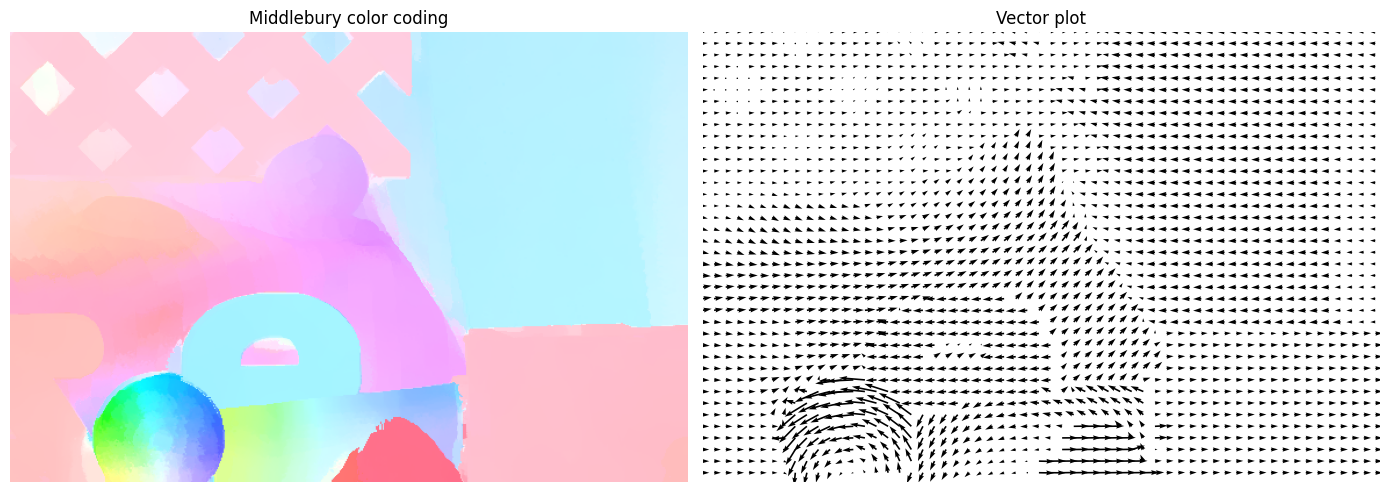

In [4]:
# Display estimated flow fields (matches MATLAB: subplot(1,2,1) color + subplot(1,2,2) quiver)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Middlebury color coding
color_img = flow_to_color(uv)
axes[0].imshow(color_img)
axes[0].set_title('Middlebury color coding')
axes[0].axis('off')

# Vector plot
plot_flow(uv, style='quiver', ax=axes[1], step=10)
axes[1].set_title('Vector plot')

plt.tight_layout()
plt.show()

## Evaluate Against Ground Truth

In [5]:
# Evaluate (matches MATLAB: flowAngErr(tu, tv, uv(:,:,1), uv(:,:,2), 0))
aae, std_ae, aepe = flow_angular_error(tu, tv, uv[:, :, 0], uv[:, :, 1], border=0)
print(f'\nAAE {aae:.3f} average EPE {aepe:.3f}')
print(f'\n(MATLAB reference: AAE 2.401 average EPE 0.076)')


AAE 2.458 average EPE 0.080

(MATLAB reference: AAE 2.401 average EPE 0.076)


## Comparison with Ground Truth

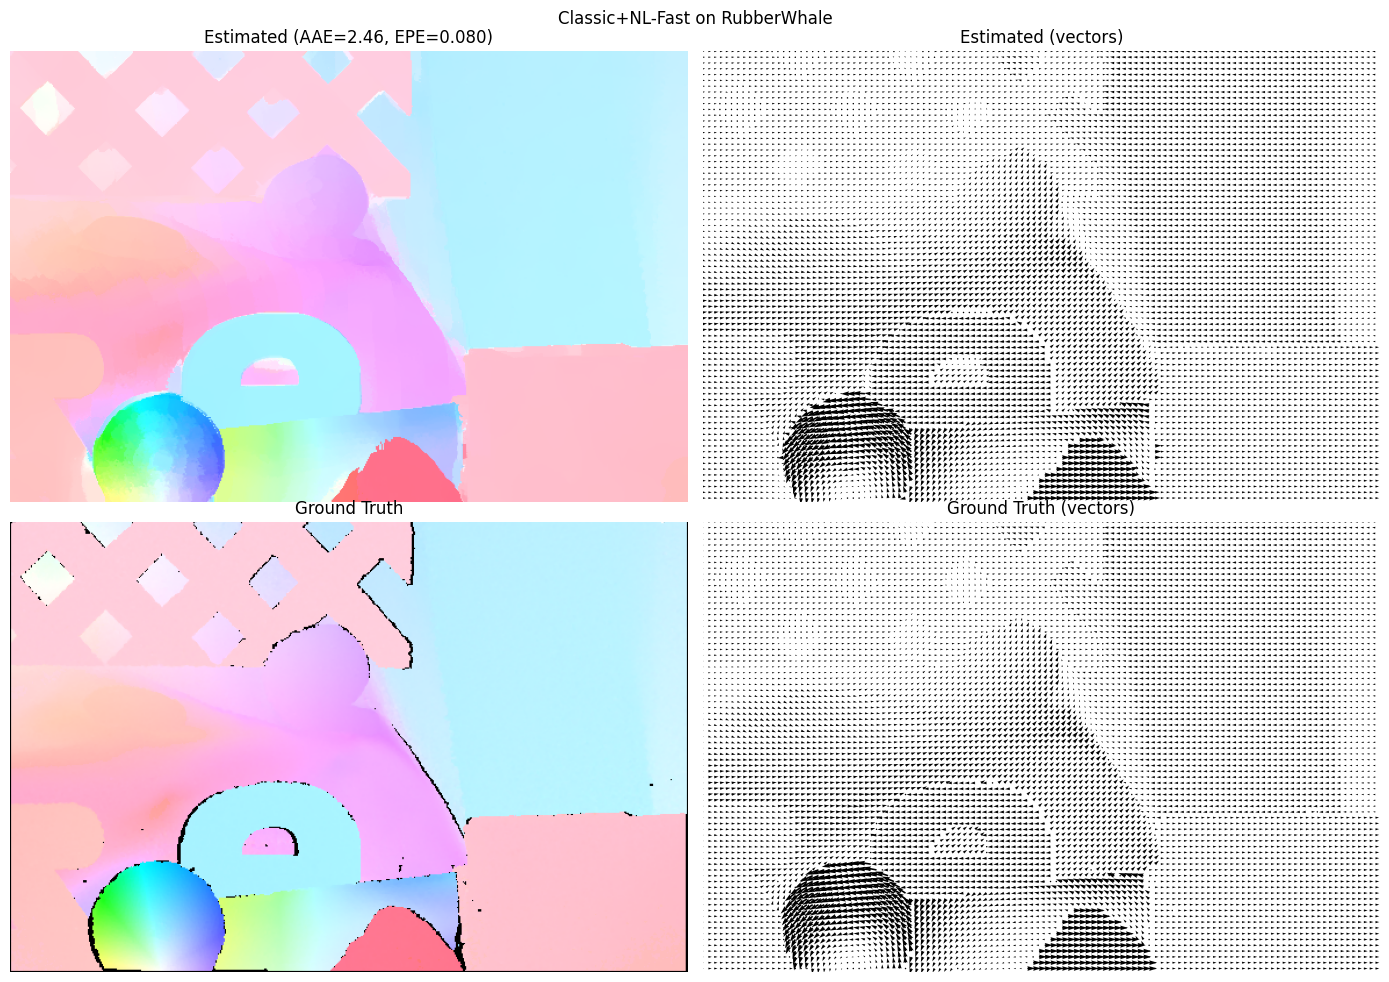

In [6]:
# Side-by-side comparison: estimated vs ground truth
gt_flow = np.stack([tu, tv], axis=2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Estimated flow
color_est = flow_to_color(uv)
axes[0, 0].imshow(color_est)
axes[0, 0].set_title(f'Estimated (AAE={aae:.2f}, EPE={aepe:.3f})')
axes[0, 0].axis('off')

plot_flow(uv, style='quiver', ax=axes[0, 1], step=5)
axes[0, 1].set_title('Estimated (vectors)')

# Ground truth
color_gt = flow_to_color(gt_flow)
axes[1, 0].imshow(color_gt)
axes[1, 0].set_title('Ground Truth')
axes[1, 0].axis('off')

plot_flow(gt_flow, style='quiver', ax=axes[1, 1], step=5)
axes[1, 1].set_title('Ground Truth (vectors)')

plt.suptitle('Classic+NL-Fast on RubberWhale')
plt.tight_layout()
plt.show()